In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from analysis_dependencies import get_wrf_slp

In [5]:
data_dir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/case_archives/march2020/R_mu/negative/uvTq/'
sens_fil = 'gradient_wrfplus_d01_unpi00'
wrfi_fil = 'wrfinput_d01_unpi00'
sens_hdl = Dataset(data_dir + sens_fil)
wrfi_hdl = Dataset(data_dir + wrfi_fil)
trueLat1 = wrfi_hdl.TRUELAT1
trueLat2 = wrfi_hdl.TRUELAT2
cenLat = wrfi_hdl.CEN_LAT
cenLon = wrfi_hdl.CEN_LON

In [4]:
lat = np.asarray(wrfi_hdl.variables['XLAT']).squeeze()
lon = np.asarray(wrfi_hdl.variables['XLONG']).squeeze()
slp = np.asarray(get_wrf_slp(wrfi_hdl)).squeeze()
amu = np.asarray(sens_hdl.variables['A_MU']).squeeze()


In [6]:
datProj = ccrs.LambertConformal(central_longitude=cenLon,
                                central_latitude=cenLat,
                                standard_parallels=(trueLat1,trueLat2))
pltProj = ccrs.PlateCarree()

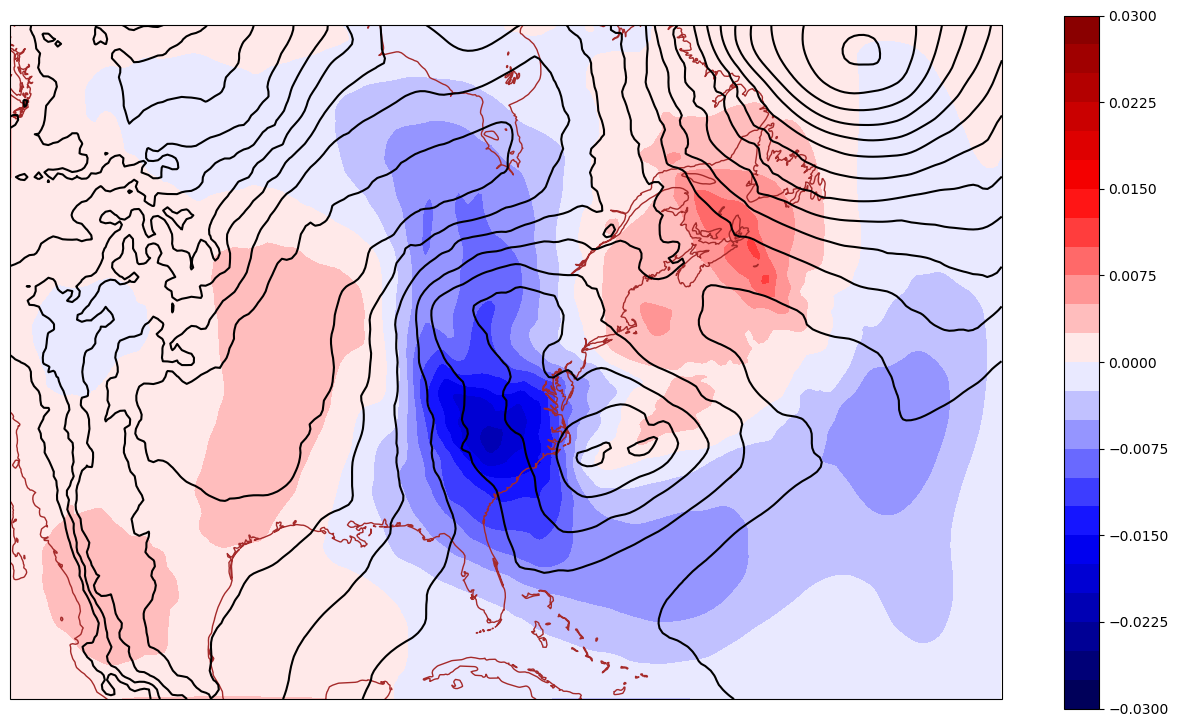

In [22]:
conrng = np.arange(964.,1042.1,4.)
shdrng = np.arange(-0.030,0.031,0.0025)
mask=np.ones((np.size(shdrng)),dtype='bool')
mask[shdrng==0.]=False

fig=plt.figure(figsize=(16,9))
ax=plt.axes(projection=datProj)
shd=ax.contourf(lon,lat,amu,shdrng[mask],transform=pltProj,cmap='seismic',vmin=np.min(shdrng),vmax=np.max(shdrng))
con=ax.contour(lon,lat,slp,conrng,transform=pltProj,colors='black')
ax.add_feature(cfeature.COASTLINE,color='brown')
fig.colorbar(mappable=shd)
plt.show()

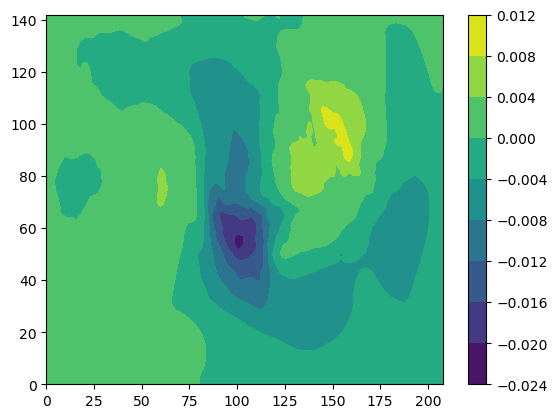

In [8]:
plt.contourf(amu)
plt.colorbar()
plt.show()